### Assignment 5 - Multiple-category classification and resampling

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we examine a dataset of car crashes.<br>
It shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD).
About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time.<br>

We will use the dataset to classify the severity of accidents. The target variable is 'MOST_SEVERE_INJURY'. Most variable names are self explanatory.

I will do most data preparation because we did not learn the coding in class. The point is not the coding, but the way I approach the data and the problems.



1. Import the libraries

In [1]:
import pandas as pd
import statsmodels.api as sm

2. Read in the dataset and display basic information about the dataset.

In [2]:
crashes = pd.read_csv('Crashes-clean.csv')
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,8/18/2023 12:50,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [6]:
crashes.shape

(820587, 41)

3. Count the frequency distribution of the target variable 'MOST_SEVERE_INJURY'. Make a graph. What do you observe? What's the percentage of the majority category?

NO INDICATION OF INJURY     0.862036
NONINCAPACITATING INJURY    0.077793
REPORTED, NOT EVIDENT       0.042151
INCAPACITATING INJURY       0.016918
FATAL                       0.001102
Name: MOST_SEVERE_INJURY, dtype: float64


<Axes: >

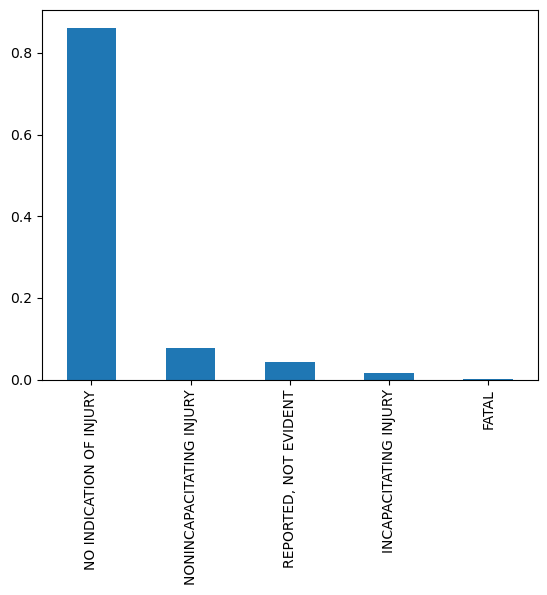

In [3]:
val_counts = crashes['MOST_SEVERE_INJURY'].value_counts(normalize=True)
print(val_counts)
val_counts.plot(kind='bar')

4. The variable 'DAMAGE' indicates the damage of a crash in terms of dollar amount, another measurement of crash outcome. We can check its relationship with ''MOST_SEVERE_INJURY' using cross-tabulation. How do you interpret the table?

In [4]:
pd.crosstab(crashes['MOST_SEVERE_INJURY'],crashes['DAMAGE'])

DAMAGE,$500 OR LESS,"$501 - $1,500","OVER $1,500"
MOST_SEVERE_INJURY,,,
FATAL,75,53,774
INCAPACITATING INJURY,2028,1400,10424
NO INDICATION OF INJURY,76623,202825,426375
NONINCAPACITATING INJURY,10070,7254,46372
"REPORTED, NOT EVIDENT",4584,5319,24610


5. Next we explore variables that we may use to predict severity of crashes.<br>

In [5]:
crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [6]:
# First, let's examine variables starting from 'POSTED_SPEED_LIMIT' to 'HIT_AND_RUN_I'
# We can use a loop to go through all of them.
for i in range(2,18):
    print(crashes.columns[i])
    crashes_val_cnt = crashes[crashes.columns[i]].value_counts()
    #print(crashes_val_cnt)

POSTED_SPEED_LIMIT
TRAFFIC_CONTROL_DEVICE
DEVICE_CONDITION
WEATHER_CONDITION
LIGHTING_CONDITION
FIRST_CRASH_TYPE
TRAFFICWAY_TYPE
LANE_CNT
ALIGNMENT
ROADWAY_SURFACE_COND
ROAD_DEFECT
REPORT_TYPE
CRASH_TYPE
INTERSECTION_RELATED_I
NOT_RIGHT_OF_WAY_I
HIT_AND_RUN_I


5.1 About 'POSTED_SPEED_LIMIT'

In [7]:
# Based on the results, we need to further clean and prepare the data.
# First is 'POSTED_SPEED_LIMIT'. Based on our life knowledge, we probably never saw speed limit
# of 1, 2, 3 or 26. We do not have further information, but it might be reasonable to transform
# the irregular numbers to closest 5 or 10.
# To do that, we can use apply() method with a lambda function.
# The lambda function takes each value, divde it by 5, round the result and mulitply it by 5.
# This is not the most efficient way, but easier to show the idea.

crashes['POSTED_SPEED_LIMIT'] = crashes['POSTED_SPEED_LIMIT'].apply(lambda x: round(x/5)*5)

5.2 About 'LANE_CNT'

In [9]:
# The literal meaning seems to be the number of lanes involved in crashes.
# However, many numbers we cannot explain, i.e., all those greater than 12.
# It seems not possible to have so many lanes.
# So, before we have more information about this variable, we will not use it.

5.3. About 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', and 'HIT_AND_RUN_I'.

In [10]:
# These three variables have many missing values, more than half.
# To maintain the data's power, we decide not to use these three variables.

5.4 About all other variables in this set.

In [11]:
# They are all categorical variables.
# We will include them in our analysis.

6. Another set of variables are about time. There are three coded variables 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', and 'CRASH_MONTH', indicating the time features of crashes. For instance, if the crashes happens on 1pm 4/8/2024, the variables will be 'CRASH_HOUR'-13, 'CRASH_DAY_OF_WEEK'-1, and 'CRASH_MONTH'-4. These variables can help to capture time-related features that have impacts on car crashes. For instance, crashes may be more likely to happen during night time or rush hours.<br>

I would like to add a variable 'Crash_Year' to control the yearly changes of car crashes and to show you how we can work with datetime variables.

In [12]:
# First, we will transform the 'CRASH_DATE' variable into Pandas Datetime datatype.
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])

# Then we can create a new variable using accessor dt.year
crashes['Crash_Year'] = crashes['CRASH_DATE'].dt.year

In [14]:
crashes['Crash_Year'].unique()

array([2023, 2019, 2022, 2020, 2021, 2018, 2016, 2017, 2015, 2024, 2013,
       2014])

7. The other variables include more details about the crash outcome and location information. We will not use them. The variable 'BEAT_OF_OCCURRENCE' shows to be numeric. Each number is referring to a patrol area of police. I think it might be a simplified indicator of locations. To use it, we need to transform it to a categorical variable.

In [15]:
crashes['BEAT_OF_OCCURRENCE'] = crashes['BEAT_OF_OCCURRENCE'].astype('category')

8. One last step is to correctly specify categorical variables. Some variables were assigned as numeric values, but their inherent meaning is categorical. For instance, the day of the month, we cannot say that day 30 is greater than day 1. So, we need to change their datatype to category. These variables include 'POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', and 'Crash_Year'.

In [16]:
crashes['POSTED_SPEED_LIMIT'] = crashes['POSTED_SPEED_LIMIT'].astype('category')
crashes['CRASH_HOUR'] = crashes['CRASH_HOUR'].astype('category')
crashes['CRASH_DAY_OF_WEEK'] = crashes['CRASH_DAY_OF_WEEK'].astype('category')
crashes['CRASH_MONTH'] = crashes['CRASH_MONTH'].astype('category')
crashes['Crash_Year'] = crashes['Crash_Year'].astype('category')

9. Next we select the variables we need for analysis. The variables we keep for analysis include:<br>
'MOST_SEVERE_INJURY', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',        'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'Crash_Year'<br>

In [17]:
# prompt: Next we select the variables we need for analysis. The variables we keep for analysis include:
# 'MOST_SEVERE_INJURY', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'Crash_Ye

df_selected_crashes = crashes[['MOST_SEVERE_INJURY', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'Crash_Year']]


For these variables, missing values only constitute a small percentage. So, we decide to drop them. Drop observations with missing values

In [18]:
# prompt: For these variables, missing values only constitute a small percentage. So, we decide to drop them. Drop observations with missing values

df_selected_crashes = df_selected_crashes.dropna()


9. Next we split train and test datasets (Validation dataset approach).

Prepare X and y.

In [19]:
# prompt: Prepare X and y.

y = df_selected_crashes['MOST_SEVERE_INJURY']
X = df_selected_crashes.drop('MOST_SEVERE_INJURY', axis=1)


In [20]:
y.head()

0       INCAPACITATING INJURY
1     NO INDICATION OF INJURY
2     NO INDICATION OF INJURY
3     NO INDICATION OF INJURY
4    NONINCAPACITATING INJURY
Name: MOST_SEVERE_INJURY, dtype: object

# New Section

In [35]:
# prompt: Turn all variables in X to dummy variables. using patsy
import patsy

# Create a formula describing the model
formula = 'C(MOST_SEVERE_INJURY) ~ ' + '+'.join(X.columns)

# Use patsy to create a design matrix
design_matrix = patsy.dmatrices(formula, data=df_selected_crashes, return_type='dataframe')

# Extract the predictor matrix
X_transformed = design_matrix[1]

# Print the transformed predictor matrix
print(X_transformed.head())



   Intercept  POSTED_SPEED_LIMIT[T.5]  POSTED_SPEED_LIMIT[T.10]  \
0        1.0                      0.0                       0.0   
1        1.0                      0.0                       0.0   
2        1.0                      0.0                       0.0   
3        1.0                      0.0                       0.0   
4        1.0                      0.0                       0.0   

   POSTED_SPEED_LIMIT[T.15]  POSTED_SPEED_LIMIT[T.20]  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       1.0                       0.0   

   POSTED_SPEED_LIMIT[T.25]  POSTED_SPEED_LIMIT[T.30]  \
0                       0.0                       1.0   
1                       0.0                       0.0   
2                       0.0                       1.0   
3                       0.

In [22]:
y.head()

0       INCAPACITATING INJURY
1     NO INDICATION OF INJURY
2     NO INDICATION OF INJURY
3     NO INDICATION OF INJURY
4    NONINCAPACITATING INJURY
Name: MOST_SEVERE_INJURY, dtype: object

Turn all variables in X to dummy variables.

Split the dataset to train and test.

In [23]:
# prompt: Split the dataset to train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=42)


In [26]:
import pandas as pd

X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,Intercept,POSTED_SPEED_LIMIT[T.5],POSTED_SPEED_LIMIT[T.10],POSTED_SPEED_LIMIT[T.15],POSTED_SPEED_LIMIT[T.20],POSTED_SPEED_LIMIT[T.25],POSTED_SPEED_LIMIT[T.30],POSTED_SPEED_LIMIT[T.35],POSTED_SPEED_LIMIT[T.40],POSTED_SPEED_LIMIT[T.45],...,Crash_Year[T.2015],Crash_Year[T.2016],Crash_Year[T.2017],Crash_Year[T.2018],Crash_Year[T.2019],Crash_Year[T.2020],Crash_Year[T.2021],Crash_Year[T.2022],Crash_Year[T.2023],Crash_Year[T.2024]
116075,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
380069,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
168361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
248267,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
281614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


10. Next we will fit different classifiers: KNN, LDA, QDA and NB.

10.1 Import classifier modules

In [27]:
# prompt:  Import classifier modules

from sklearn import neighbors, discriminant_analysis, naive_bayes


10.2 Initiate the classifiers

In [28]:
# prompt: Initiate the classifiers

knn = neighbors.KNeighborsClassifier()
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
nb = naive_bayes.GaussianNB()


10.3 Fit the KNN using the training dataset and get the accuracy score and confusion matrix for the test dataset.<br>
NOTE: It will take <b>a long time</b> (more than 30 minutes on my computer) to run the prediction. You may want to leave the program run and come back later for the results.

How to read the confusion matrix?

In [39]:
from sklearn import metrics
from dmba import classificationSummary
import numpy as np

X_test = np.array(X_test)
knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(metrics.accuracy_score(y_test, knn_predict))
print(metrics.confusion_matrix(y_test, knn_predict))
print("Confusion Matrix")
classificationSummary(y_test, knn_predict)




/Users/pujamadhav/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8580559441594683
[[     0      8    267     14      1]
 [     1     52   4238    261     28]
 [     6    240 230702   1654    300]
 [     5    195  19720   1027    100]
 [     1     52  10932    330     64]]
Confusion Matrix
Confusion Matrix (Accuracy 0.8581)

       Prediction
Actual      0      1      2      3      4
     0      0      8    267     14      1
     1      1     52   4238    261     28
     2      6    240 230702   1654    300
     3      5    195  19720   1027    100
     4      1     52  10932    330     64


The KNN classifier achieved an accuracy of 85.8% on the test dataset. This means that it correctly classified 85.8% of the crashes in the test dataset.

The confusion matrix shows the number of crashes that were correctly and incorrectly classified by the KNN classifier. The diagonal elements of the matrix show the number of crashes that were correctly classified. For example, the element in the second row and second  column shows that 52 crashes with no injuries were correctly classified as such.

The off-diagonal elements of the matrix show the number of crashes that were incorrectly classified. For example, the element in the first row and second column shows that 8 crashes with no injuries were incorrectly classified as having non-incapacitating injuries.

Overall, the KNN classifier performed moderately well on the test dataset. It was able to correctly classify the majority of crashes, but it also made some mistakes.

10.4. Repeat for LDA.

In [37]:
# prompt: Repeat for LDA.

lda.fit(X_train, y_train)
lda_predict = lda.predict(X_test)


In [36]:
# prompt: print the accuracy and cinfusion matric for lda
from sklearn import metrics
from dmba import classificationSummary


lda = discriminant_analysis.LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)
lda_predict = lda.predict(X_test)
print(metrics.accuracy_score(y_test, lda_predict))
print(metrics.confusion_matrix(y_test, lda_predict))
print("Confusion Matrix")
classificationSummary(y_test, lda_predict)



0.8648250542194983
[[    10     58    211     11      0]
 [    61   1057   3064    398      0]
 [   225    752 230601   1324      0]
 [   170   3252  15619   2006      0]
 [    34   1021   9861    463      0]]
Confusion Matrix
Confusion Matrix (Accuracy 0.8648)

       Prediction
Actual      0      1      2      3      4
     0     10     58    211     11      0
     1     61   1057   3064    398      0
     2    225    752 230601   1324      0
     3    170   3252  15619   2006      0
     4     34   1021   9861    463      0


The LDA classifier achieved an accuracy of 86.4% on the test dataset. This means that it correctly classified 86.4% of the crashes in the test dataset.

The confusion matrix shows the number of crashes that were correctly and incorrectly classified by the LDA classifier. The diagonal elements of the matrix show the number of crashes that were correctly classified. For example, the element in the first row and first column shows that 10 crashes with no injuries were correctly classified as such.

The off-diagonal elements of the matrix show the number of crashes that were incorrectly classified. For example, the element in the first row and second column shows that 58 crashes with no injuries were incorrectly classified as having non-incapacitating injuries.

Overall, the LDA classifier performed moderately well on the test dataset. It was able to correctly classify the majority of crashes, but it also made some mistakes.

In simple words, the LDA classifier correctly classified about 86% of the crashes in the test dataset. It made some mistakes, but it was still able to correctly classify the majority of crashes.

10.5 Repeat for QDA. What is your observation?

In [33]:
# prompt: Repeat for QDA. What is your observation?
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)
y_pred_qda_train = qda.predict(X_train)




print('Accuracy of QDA classifier on test set: {:.2f}'.format(qda.score(X_test, y_test)))
print('Accuracy of QDA classifier on training set: {:.2f}'.format(qda.score(X_train, y_train)))


print('Confusion matrix of QDA classifier on test set:')
print(confusion_matrix(y_test, y_pred_qda))
print("Confusion Matrix")
classificationSummary(y_test, y_pred_qda)

# Observations:
# 1. The accuracy of QDA on the training set is 1.0, which means it perfectly classifies all the training samples. However, the accuracy on the test set is only 0.48, which indicates overfitting.
# 2. The confusion matrix shows that QDA misclassifies a significant number of samples, especially those belonging to the "Other" and "Non-incapacitating Injury" categories.
# 3. Compared to KNN and LDA, QDA performs the worst on the test set, suggesting that it is not suitable for this classification problem.


/Users/pujamadhav/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of QDA classifier on test set: 0.04
Accuracy of QDA classifier on training set: 0.05
Confusion matrix of QDA classifier on test set:
[[   245     23      3      2     17]
 [  3723    374    100     41    342]
 [185528  15922  10343   1350  19759]
 [ 17068   1659    433    163   1724]
 [  9163    852    260     87   1017]]
Confusion Matrix
Confusion Matrix (Accuracy 0.0449)

       Prediction
Actual      0      1      2      3      4
     0    245     23      3      2     17
     1   3723    374    100     41    342
     2 185528  15922  10343   1350  19759
     3  17068   1659    433    163   1724
     4   9163    852    260     87   1017


The accuracy of the QDA classifier on the test set is 4%. This means that it correctly classified 4% of the crashes in the test dataset.

The confusion matrix shows the number of crashes that were correctly and incorrectly classified by the ADA classifier. The diagonal elements of the matrix show the number of crashes that were correctly classified. For example, the element in the first row and first column shows that 245 crashes with no injuries were correctly classified as such.

The off-diagonal elements of the matrix show the number of crashes that were incorrectly classified. For example, the element in the first row and second column shows that 23 crashes with no injuries were incorrectly classified as having non-incapacitating injuries.


10.6 Repeat for Naive Bayes. What is your observation?

In [38]:
# prompt: Repeat for Naive Bayes. What is your observation?
from dmba import classificationSummary

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_pred_nb_train = nb.predict(X_train)




print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'.format(nb.score(X_train, y_train)))


print('Confusion matrix of Naive Bayes classifier on test set:')
print(confusion_matrix(y_test, y_pred_nb))
print("Confusion Matrix")
classificationSummary(y_test, y_pred_nb)


Accuracy of Naive Bayes classifier on test set: 0.06
Accuracy of Naive Bayes classifier on training set: 0.06
Confusion matrix of Naive Bayes classifier on test set:
[[   245     26      2      7     10]
 [  3729    467     70    141    173]
 [186661  19005  13441   4092   9703]
 [ 17099   2167    321    601    859]
 [  9181   1061    269    289    579]]
Confusion Matrix
Confusion Matrix (Accuracy 0.0567)

       Prediction
Actual      0      1      2      3      4
     0    245     26      2      7     10
     1   3729    467     70    141    173
     2 186661  19005  13441   4092   9703
     3  17099   2167    321    601    859
     4   9181   1061    269    289    579


Observations and Interpretations:

The accuracy of the Naive Bayes classifier on the test set is 5%, which means that it correctly classified 48% of the crashes in the test dataset.

The confusion matrix shows the number of crashes that were correctly and incorrectly classified by the Naive Bayes classifier. The diagonal elements of the matrix show the number of crashes that were correctly classified. For example, the element in the first row and first column shows that 245 crashes with no injuries were correctly classified as such.

The off-diagonal elements of the matrix show the number of crashes that were incorrectly classified. For example, the element in the first row and second column shows that 26 crashes with no injuries were incorrectly classified as having non-incapacitating injuries.